## Lets import some of the packages

- for now lets just import the most necessary packages and we will import the rest as and when/if required

<div class="alert alert-block alert-info">
<h4> Why are we using the following packages ?</h4>
</div>
    
- **Pandas** will provide data structures and operations for manipulating numerical tables and time series

- **Numpy** provides support for large, multi-dimensional arrays, along with a large collection of high-level mathematical functions to operate on these arrays

- **Matplotlib and Seaborn** are Data Visulaization librarires and will allow us to generate visualizations like histograms, scatter plots, bar charts, pie charts and much more 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")

## Lets read the data 

In [2]:
df  =  pd.read_csv('Crop_recommendation.csv')

#

<h1 style="text-align:center;"> Feature Engineering : Part 1 </h1>

<div class="alert alert-block alert-info">
<h2>Exploratory Data Analysis</h2>
</div>


- Here we start with our most important process that is EDA

![Start of EDA](images/EDA.jpg "Lets Start Exploring")

#

## Understanding Our Data 



<h3> Part 1 : Introduction to the dataset </h3>

<div class="alert alert-block alert-info">
<h4>How does our data look like ?</h4>
</div>

>- This part is to gain just the **Top level view** of our data, which means we will be just looking at the **basic overview** of our dataset  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


<div class="alert alert-block alert-info">
<h4>What do the Data fields Mean ?</h4>
</div> 

**N** - ratio of Nitrogen content in soil

**P** - ratio of Phosphorous content in soil

**K** - ratio of Potassium content in soil

**temperature** - temperature in degree Celsius

**humidity** - relative humidity in %

**ph** - ph value of the soil

**rainfall** - rainfall in mm

#


- Using pandas to check the first and last 5 rows

In [4]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [5]:
df.tail()

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

#

- Length and width of the data

In [6]:
df.shape

(2200, 8)

- Here's the **Descriptive** Information on our data 

In [7]:
df.describe()

N            P            K  temperature     humidity   
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000  \
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

#

<div class="alert alert-block alert-info">
<h4> Do we have any NULL values ? </h4>
</div> 

- Now then lets do one of the most important tasks of step1, checking for the **NULL** values

In [8]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

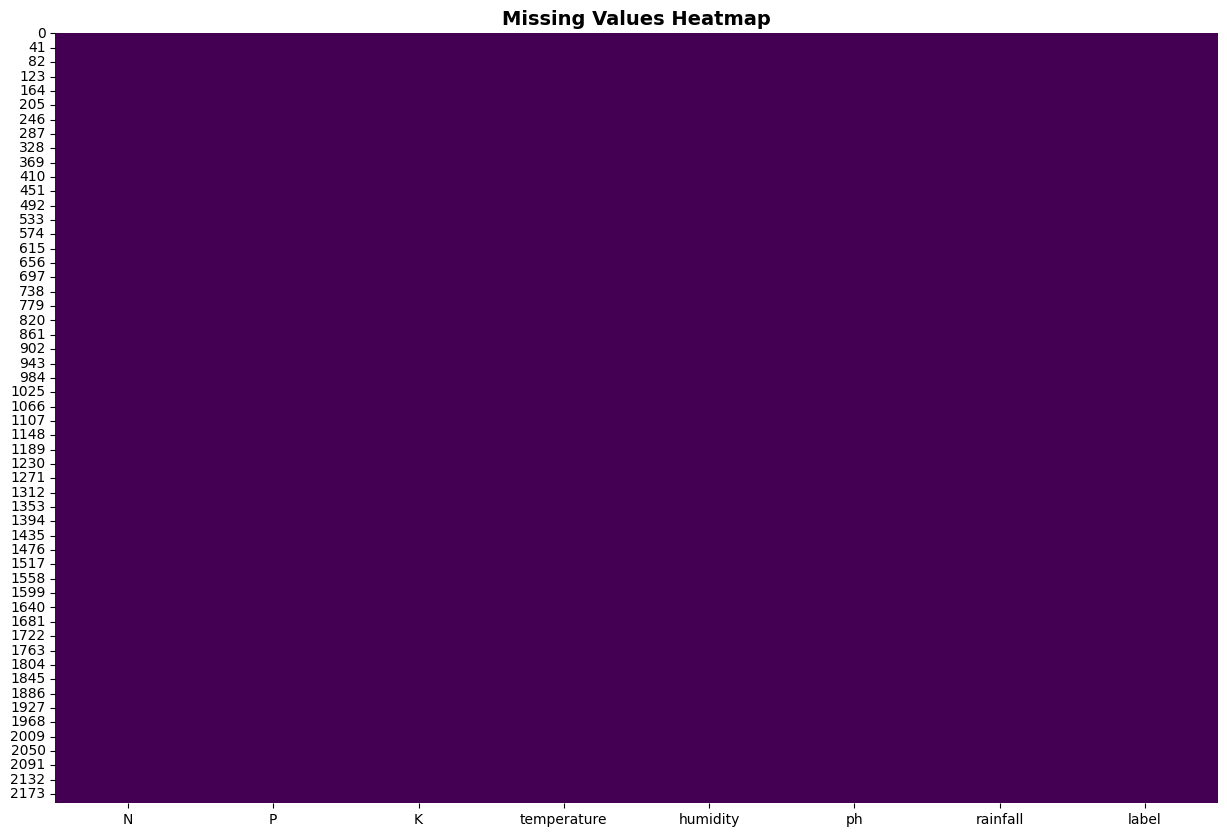

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")
plt.title("Missing Values Heatmap",fontweight="bold",fontsize=14)
plt.show()

- Hooray We dont have any null values in any of the columns

#

<div class="alert alert-block alert-success">  
<h2>Conclusion From Basic Analysis:</h2>
</div>
  
- We have 7 **Numeric** variables and 1 **Categorical** Textual variable 
- **Textual** variable is also our **Dependent** variable, we will need to use encoding
- Normally looking at the data **pH** variable is very small as compared to the othersand the mean of rainfall is very high, we will go for **Scaling** the data
- looking at the **75%** and **Max** values in df.describe there shouldnt be many outliers
- To our luck/ Bad-luck we dont have any **NULL** values


#

## Part 2: Going Into The Depth 



<img src="images/eda2.gif" width="550" align="center">


<div class="alert alert-block alert-info">
<h4> Its time to go SHERLOCK mode </h4>
</div>

- Ok! So far we have skimmed the surface of our dataset, Now though its time to work like true detectives and interreogate our dataset
- so as **sherlock holmes** said:
> ***“It is my business to know what other people do not know.”***

- Since our dependent column is Textual in nature, To do further EDA steps first thing we need to do is change the **"Label"** column to Numeric but first lets check if the data is balanced

<div class="alert alert-block alert-info">
<h4> 2.1.1  Checking if the data is balanced </h4>
</div>

In [10]:
df1 = df['label'].value_counts().reset_index()

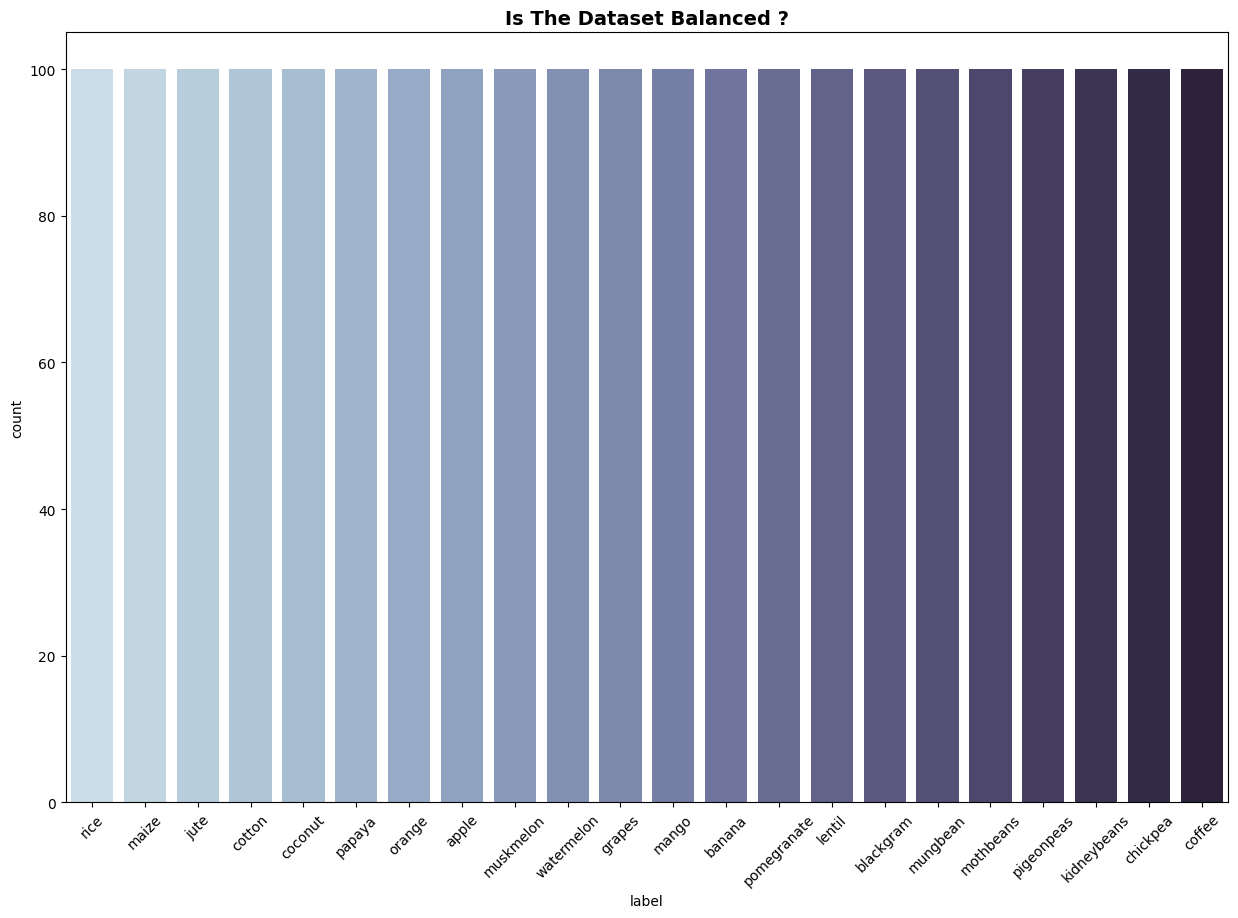

In [11]:
plt.figure(figsize=(15,10))

sns.barplot(data = df1, x = 'label',y = 'count',palette="ch:s=.25,rot=-.25")
plt.title("Is The Dataset Balanced ?",fontweight="bold",fontsize=14)
plt.xticks(rotation=45)
plt.show()


- The data is balanced so there won't be any bias

#

<div class="alert alert-block alert-info">
<h4> 2.1.2 Encoding The Dependent Variable</h4>
</div>

- Here we will be using **Label Encoder** from sklearn to convert our textual data to numeric form

In [12]:
from sklearn.preprocessing import LabelEncoder

enc  = LabelEncoder()

df['target'] = enc.fit_transform(df['label'])

- Now that we have encoded our **label** column lets see which category has been assigned what value

In [13]:
d2 = df.drop_duplicates('label').set_index('target')
d2.drop(df.columns[0:7],axis=1,inplace=True)
d2.sort_values(by='target',inplace=True)
d2

label
target             
0             apple
1            banana
2         blackgram
3          chickpea
4           coconut
5            coffee
6            cotton
7            grapes
8              jute
9       kidneybeans
10           lentil
11            maize
12            mango
13        mothbeans
14         mungbean
15        muskmelon
16           orange
17           papaya
18       pigeonpeas
19      pomegranate
20             rice
21       watermelon

- since we now have back-up available we can drop the label column from the original set

In [14]:
# But first making a copy of the original, it might be needed later on
df2 = df.copy()

df.drop(['label'],axis=1,inplace=True)

#

#


<h2> 2.2 Univariate Analysis</h2>
<div>
</div>


- The objective of doing univariate analysis is to derive the data, summarize it, and analyze the patterns present in it
    

<div class="alert alert-block alert-info">
<h4> 2.2.1 Lets check the Distribution of each variable </h4>
</div> 

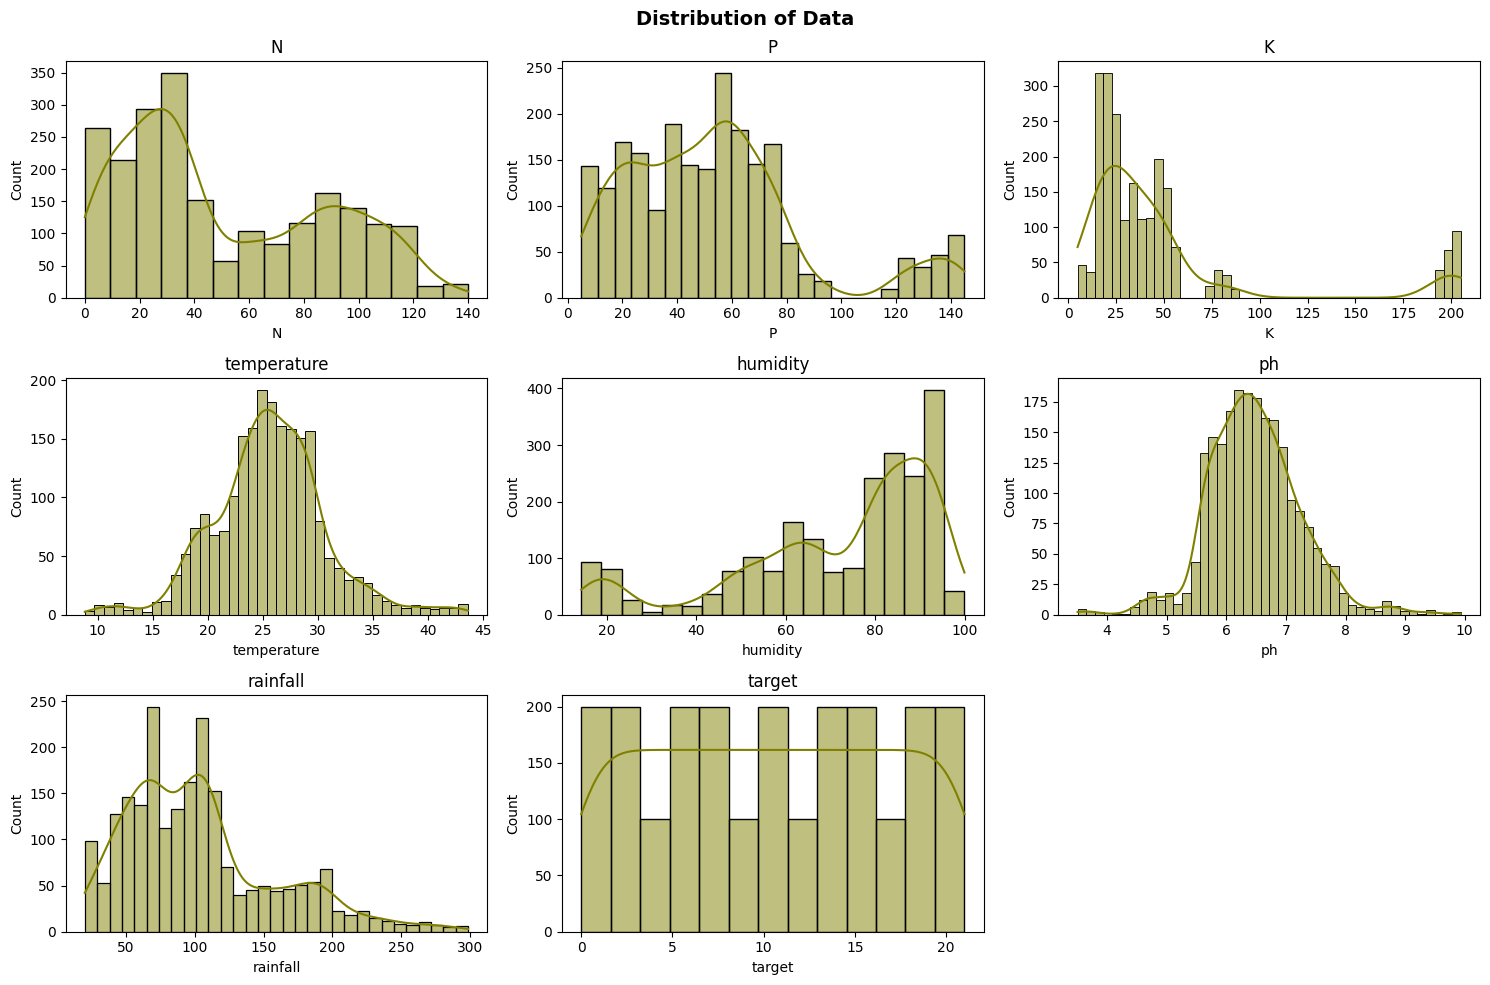

In [15]:
fig  = plt.figure(figsize=(15,10))
fig.suptitle('Distribution of Data',fontweight = "bold",fontsize=14)
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    plt.title(f"{col}")
    sns.histplot(df[col],kde=True,color ="olive")
    plt.tight_layout()
    plt.plot()

#

<div class="alert alert-block alert-info">
<h4> 2.2.2 Are There Any outliers ?</h4>
</div> 

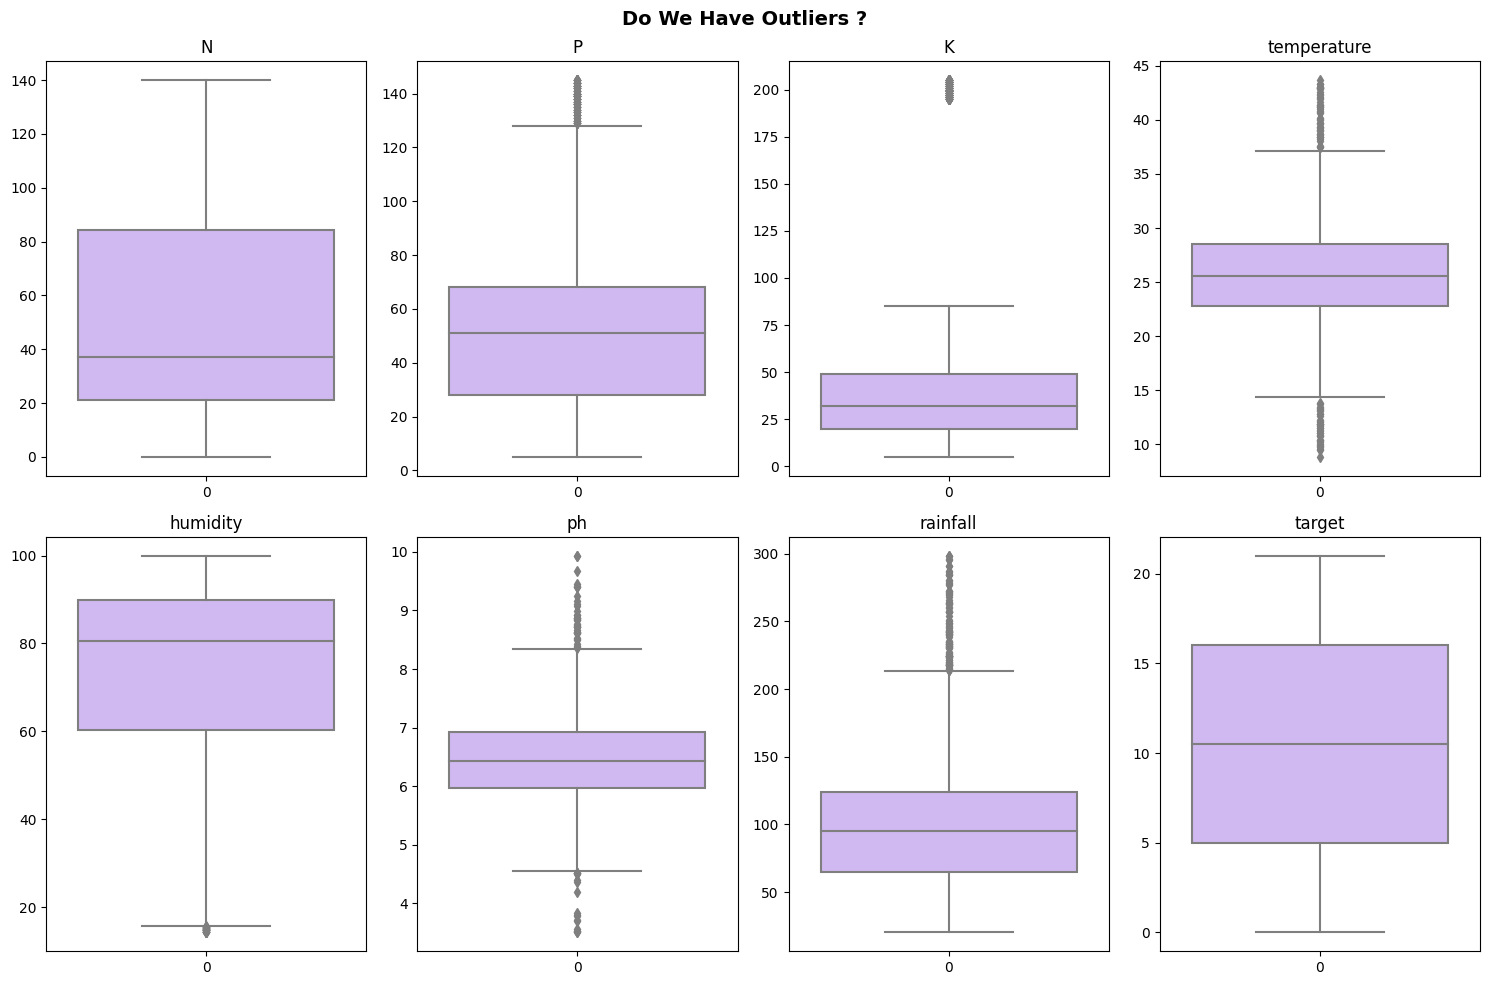

In [16]:
fig  = plt.figure(figsize=(15,10))
fig.suptitle('Do We Have Outliers ?',fontweight = "bold",fontsize=14)

for i,col in enumerate(df.columns,1):
    plt.subplot(2,4,i)
    plt.title(f"{col}")
    sns.boxplot(df[col],color = sns.xkcd_rgb["pale violet"])
    plt.tight_layout()
    plt.plot()

#

<div class="alert alert-block alert-success">  
<h2>Conclusion From Univariate Analysis:</h2>
</div>
  
- Distribution of most of the variables in **Non-Uniform** 
- It would seem like outliers exist in our dataset but if checked against dependent variable in Bivariate analysis it would be clear that these are actually not outliers. some crops need heigher than normal level of contents


#

## 2.3 Bivariate Analysis

<div class="alert alert-block alert-info">
<h4>2.3.1 Were They Actually Outliers ?</h4>
</div>


- First Lets make a function for reducing the code redundancy and for better reusability

In [17]:
def outliers_box(x):
    plt.figure(figsize=(15,10))
    sns.boxplot(y=df2[x],x=df2['label'],fliersize=15)
    plt.title(f"How Much {x} Is Needed For Each Crop ?",fontweight="bold",fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

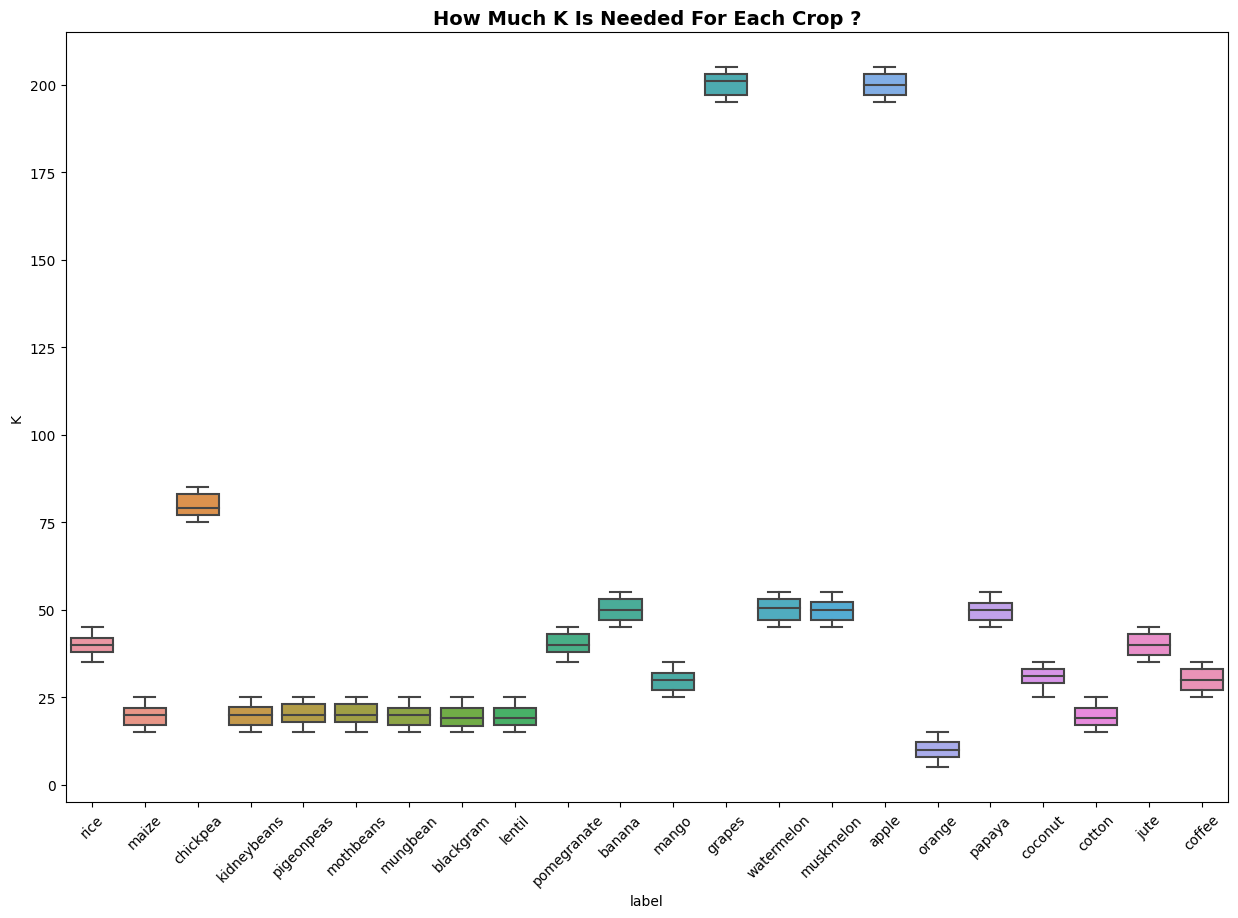

In [18]:
outliers_box("K")

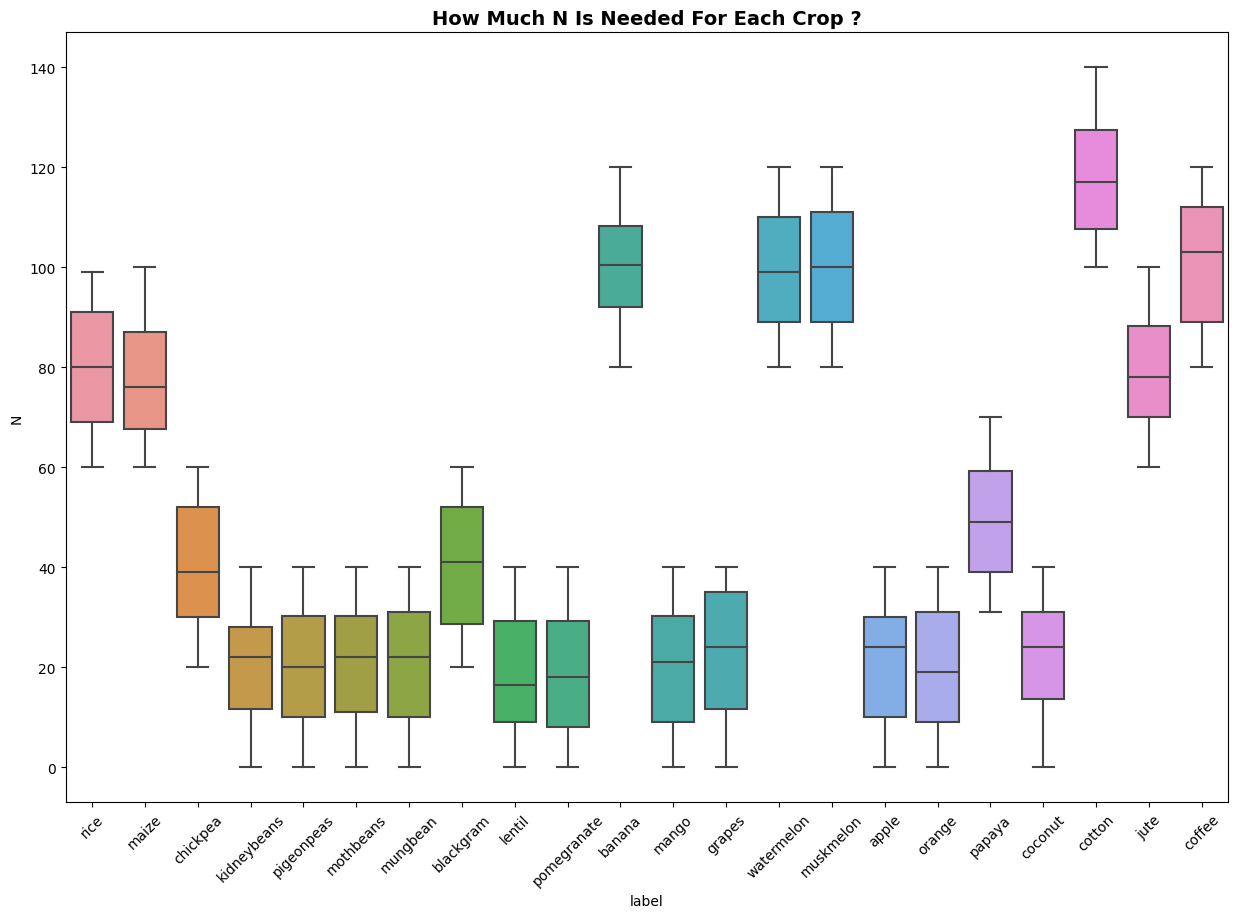

In [19]:
outliers_box("N")

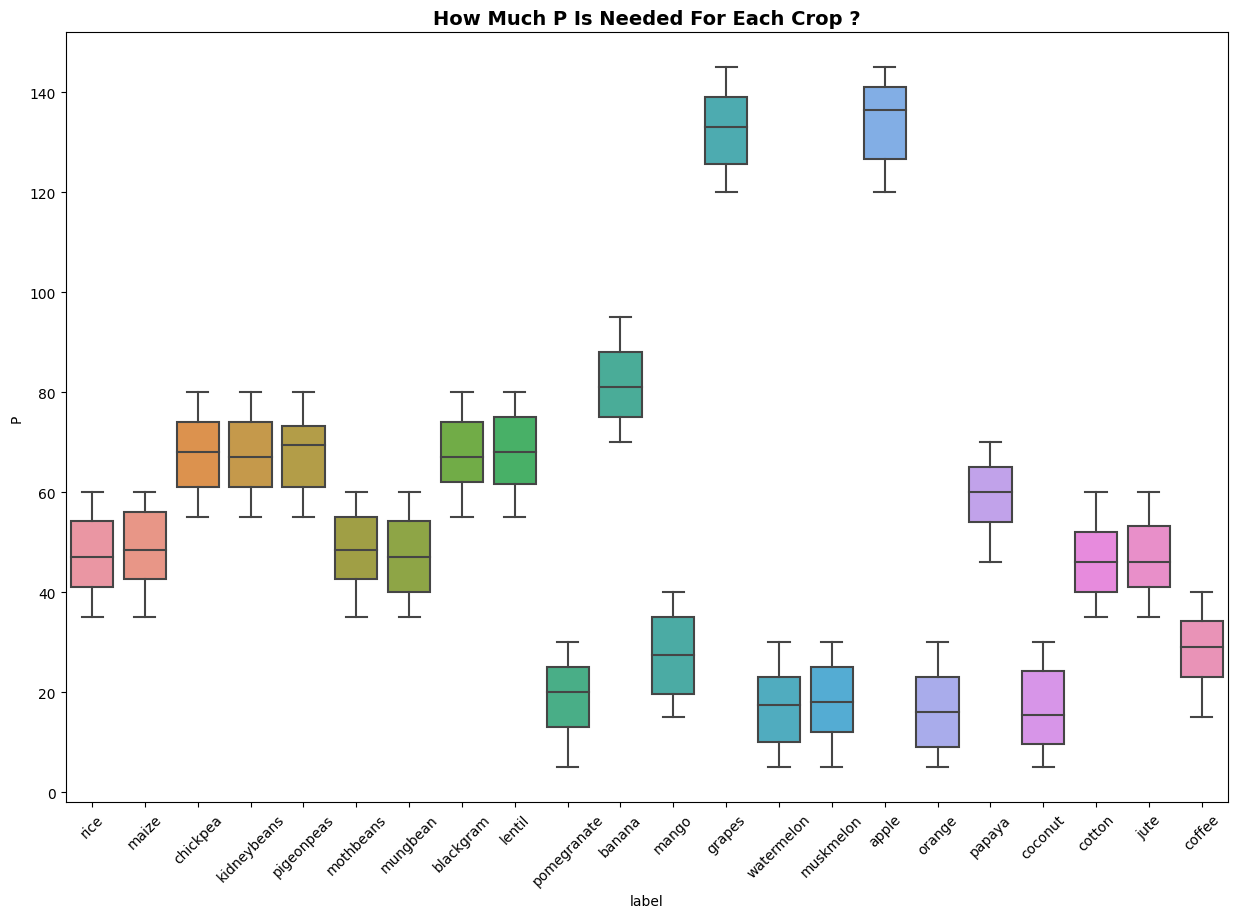

In [20]:
outliers_box("P")


<div class="alert alert-block alert-success">  
<h3>Conclusion From Boxplots:</h3>
</div>
  
- From the graphs it gets clear that they werent outliers but some crops require high content of nutrients, but it is still unclear 
- so what we will do is : 
> 1. lets create a pivot table with aggregate function of **Mean** with **Label** column as index. so we will get the mean value of each variable for individual crop
> 2. We will then plot these individually
> 3. Next lets plot these in a single plot alongside each other


#

<div class="alert alert-block alert-info">
<h4>2.3.2 Crop Summary</h4>
</div> 

In [21]:
crop_summary = pd.pivot_table(df2,index="label",aggfunc="mean")
crop_summary.rename(columns={"K":"Potassium","P":"Phosphorous","N":"Nitrogen"},inplace=True)

In [22]:
crop_summary

Potassium  Nitrogen  Phosphorous   humidity        ph   
label                                                                
apple           199.89     20.80       134.22  92.333383  5.929663  \
banana           50.05    100.23        82.01  80.358123  5.983893   
blackgram        19.24     40.02        67.47  65.118426  7.133952   
chickpea         79.92     40.09        67.79  16.860439  7.336957   
coconut          30.59     21.98        16.93  94.844272  5.976562   
coffee           29.94    101.20        28.74  58.869846  6.790308   
cotton           19.56    117.77        46.24  79.843474  6.912675   
grapes          200.11     23.18       132.53  81.875228  6.025937   
jute             39.99     78.40        46.86  79.639864  6.732778   
kidneybeans      20.05     20.75        67.54  21.605357  5.749411   
lentil           19.41     18.77        68.36  64.804785  6.927932   
maize            19.79     77.76        48.44  65.092249  6.245190   
mango            29.92     20.07        27.18  50.156573  5.766373   
mothbeans        20.23     21.44        48.01  53.160418  6.831174   
mungbean         19.87     20.99        47.28  85.499975  6.723957   
muskmelon        50.08    100.32        17.72  92.342802  6.358805   
orange           10.01     19.58        16.55  92.170209  7.016957   
papaya           50.04     49.88        59.05  92.403388  6.741442   
pigeonpeas       20.29     20.73        67.73  48.061633  5.794175   
pomegranate      40.21     18.87        18.75  90.125504  6.429172   
rice             39.87     79.89        47.58  82.272822  6.425471   
watermelon       50.22     99.42        17.00  85.160375  6.495778   

               rainfall  target  temperature  
label                                         
apple        112.654779       0    22.630942  
banana       104.626980       1    27.376798  
blackgram     67.884151       2    29.973340  
chickpea      80.058977       3    18.872847  
coconut      175.686646       4    27.409892  
coffee       158.066295       5    25.540477  
cotton        80.398043       6    23.988958  
grapes        69.611829       7    23.849575  
jute         174.792798       8    24.958376  
kidneybeans  105.919778       9    20.115085  
lentil        45.680454      10    24.509052  
maize         84.766988      11    22.389204  
mango         94.704515      12    31.208770  
mothbeans     51.198487      13    28.194920  
mungbean      48.403601      14    28.525775  
muskmelon     24.689952      15    28.663066  
orange       110.474969      16    22.765725  
papaya       142.627839      17    33.723859  
pigeonpeas   149.457564      18    27.741762  
pomegranate  107.528442      19    21.837842  
rice         236.181114      20    23.689332  
watermelon    50.786219      21    25.591767

In [23]:
def figs(x,colortype):
    plt.figure(figsize=(20,6))
    crop_new_summary = crop_summary.sort_values(by=x,ascending=False).head(10).reset_index()
    crop_new_summary.set_index("label",inplace=True)
    fig = sns.barplot(crop_new_summary, x=crop_new_summary.index, y=x,color=sns.xkcd_rgb[colortype])
    plt.title(f"10 Crops That require most {x}",fontweight="bold",fontsize=14)
    plt.show()

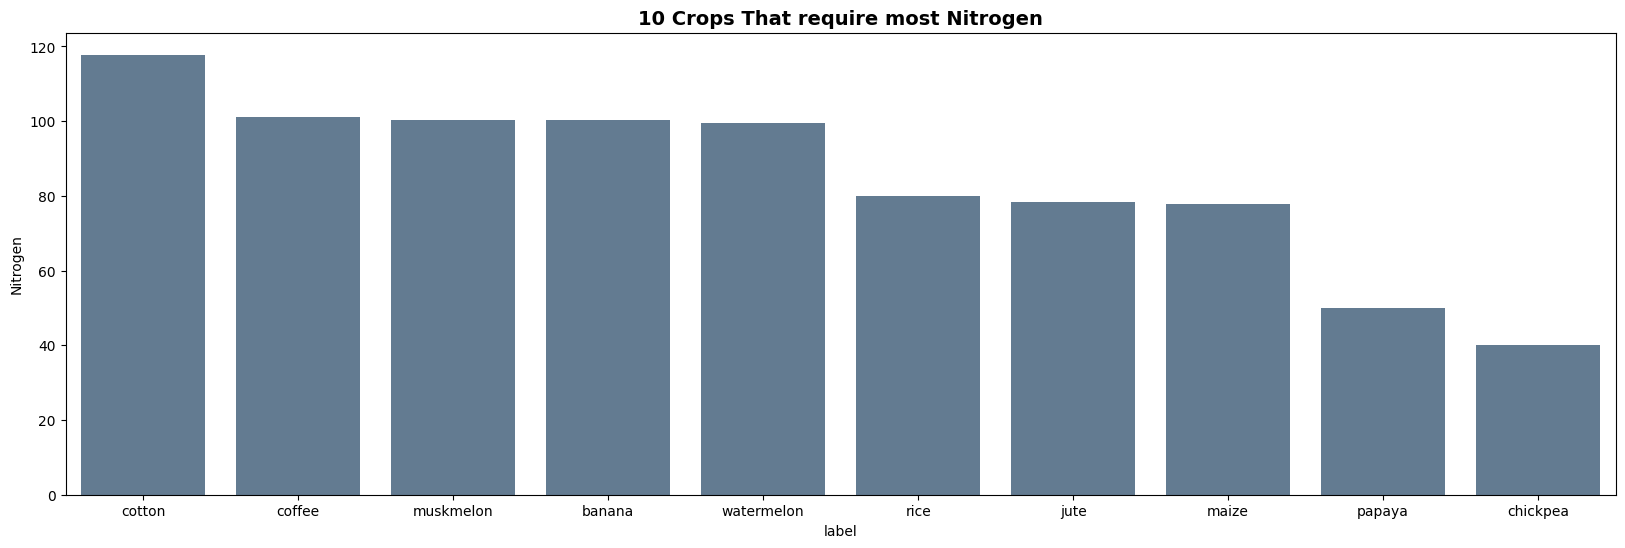

In [24]:
figs("Nitrogen","slate blue")

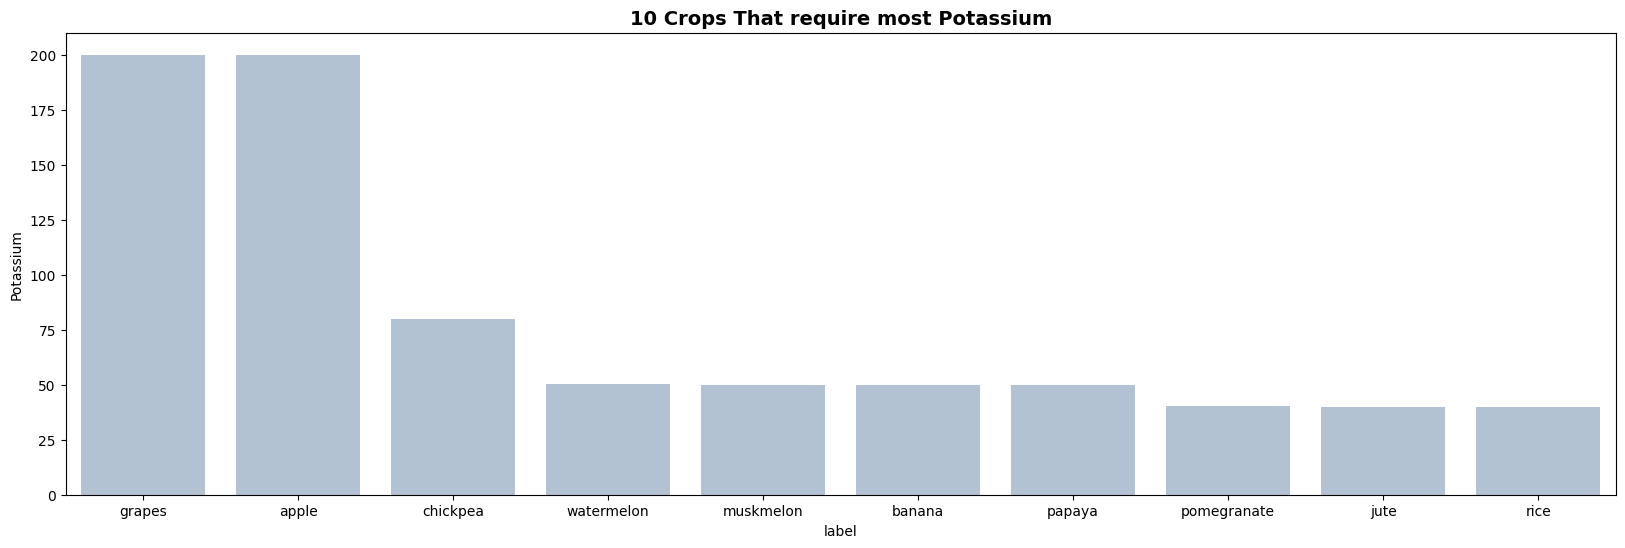

In [25]:
figs("Potassium","cloudy blue")

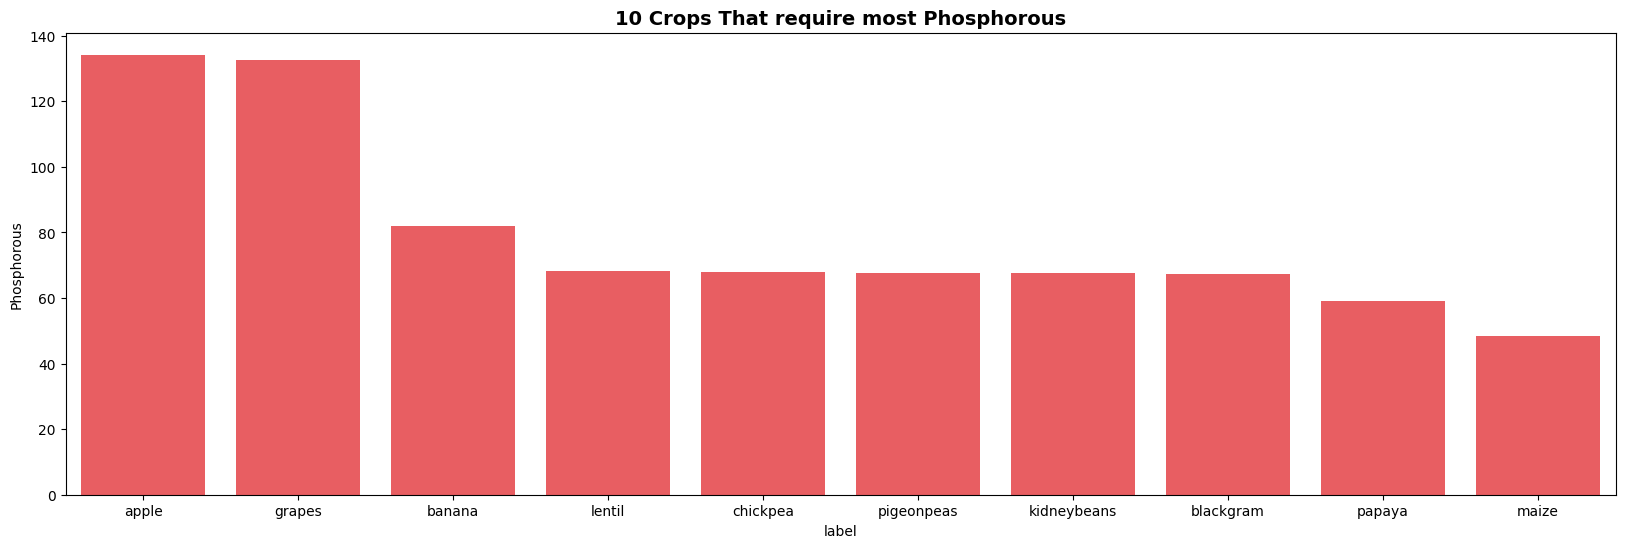

In [26]:
figs("Phosphorous","light red")

#

- Now lets plot all these on one plot with the help of an advanced data visualization library called **Plotly**

In [27]:
def combined_plot(x,y,z,xc,yc,zc):
    plt.figure(figsize=(15,10))
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=crop_summary.index,
        y=crop_summary[x],
        name=x,
        marker_color=xc
    ))
    fig.add_trace(go.Bar(
        x=crop_summary.index,
        y=crop_summary[y],
        name=y,
        marker_color=yc
    ))
    fig.add_trace(go.Bar(
        x=crop_summary.index,
        y=crop_summary[z],
        name=z,
        marker_color=zc
    ))

    fig.update_layout(title=f"Comparision of {x},{y},{z} Values Between Crops",
                      plot_bgcolor='white',
                      barmode='group',
                      xaxis_tickangle=-45)

    fig.show()



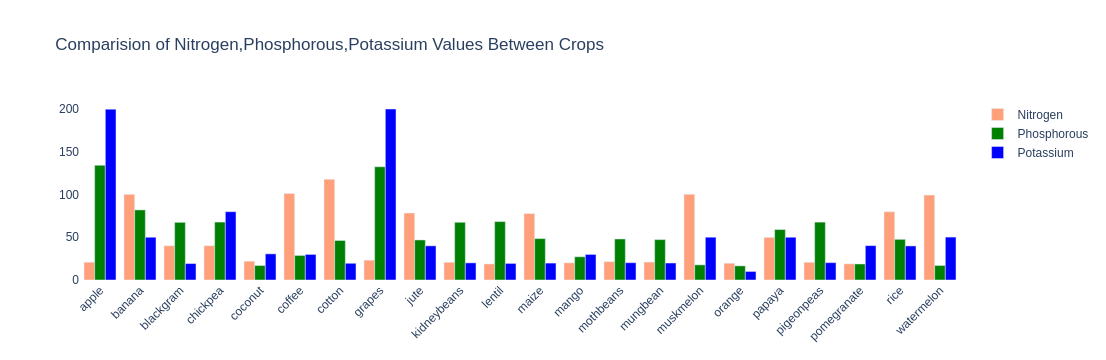

<Figure size 1500x1000 with 0 Axes>

In [28]:
combined_plot('Nitrogen','Phosphorous','Potassium','lightsalmon','green','blue')

- Lets do the same for **rainfall**, **humidity**,**ph** and **temperature**

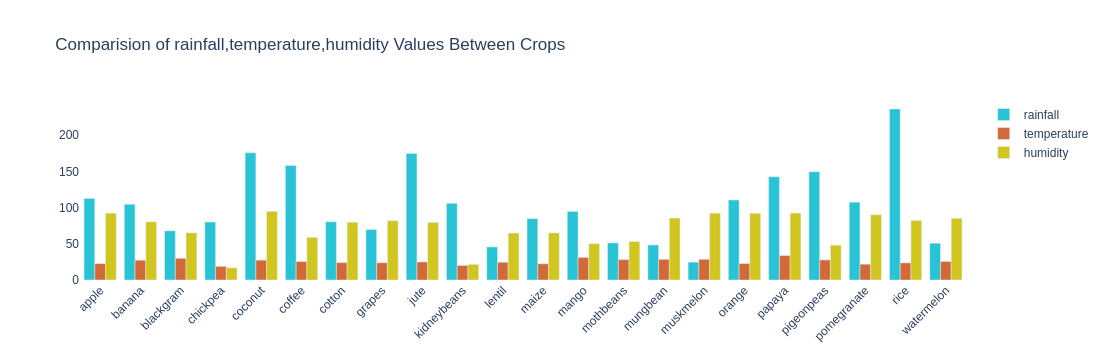

<Figure size 1500x1000 with 0 Axes>

In [29]:
combined_plot('rainfall','temperature','humidity','#28c3d4','#d16938','#d1c51f')

#

- Now the last thing remaining is looking at ph

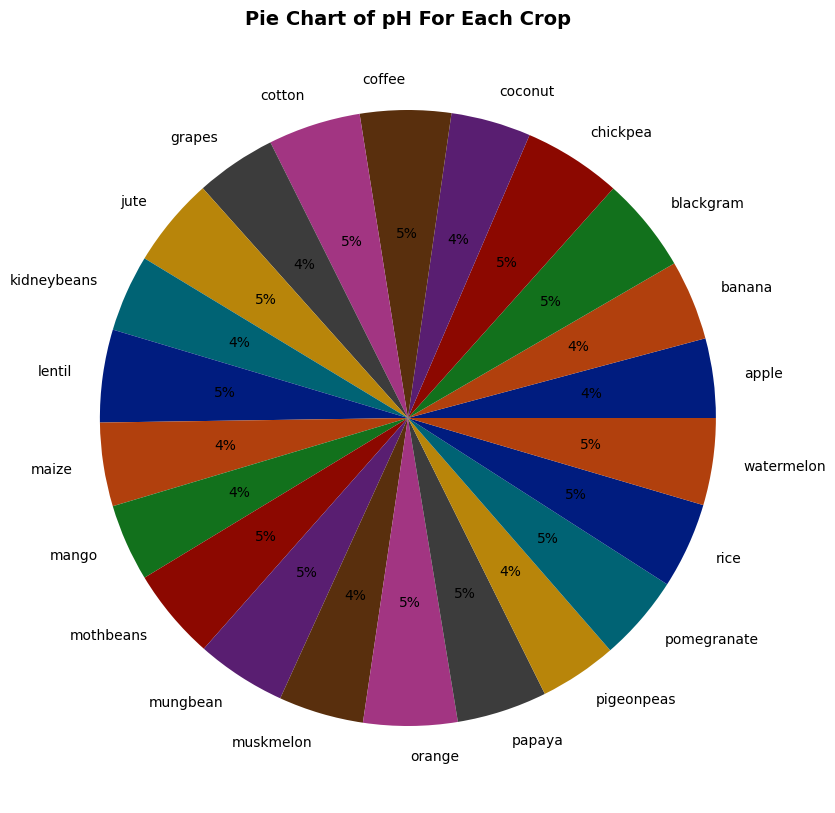

In [30]:
# declaring exploding pie
# define Seaborn color palette to use
plt.figure(figsize=(15,10))
palette_color = sns.color_palette('dark')
  
# plotting data on chart
plt.pie(crop_summary["ph"], labels=crop_summary.index, colors=palette_color, autopct='%.0f%%')
plt.title("Pie Chart of pH For Each Crop",fontweight="bold",fontsize=14)
  
# displaying chart
plt.show()

<div class="alert alert-block alert-success">  
<h3>Conclusion From Bivariate Analysis:</h3>
</div>
  
- Apple & Grapes require **Potassium** and **Phosphorous** Values
- **Cotton, Coffee, watermelon, Banana** and **Muskmelon** grow well with high **Nitrogen** Levels
- **Rice**,**Jute** and **Coconut** require heavy rainfall conditions
- Where as **Mango** and **Papaya** need high temperatures
- pH for each crop is **almost** similar

#

## 2.4 Multivariate Analysis

<div class="alert alert-block alert-info">
<h4> 2.4.1 Lets check the correlation of variables</h4>
</div>



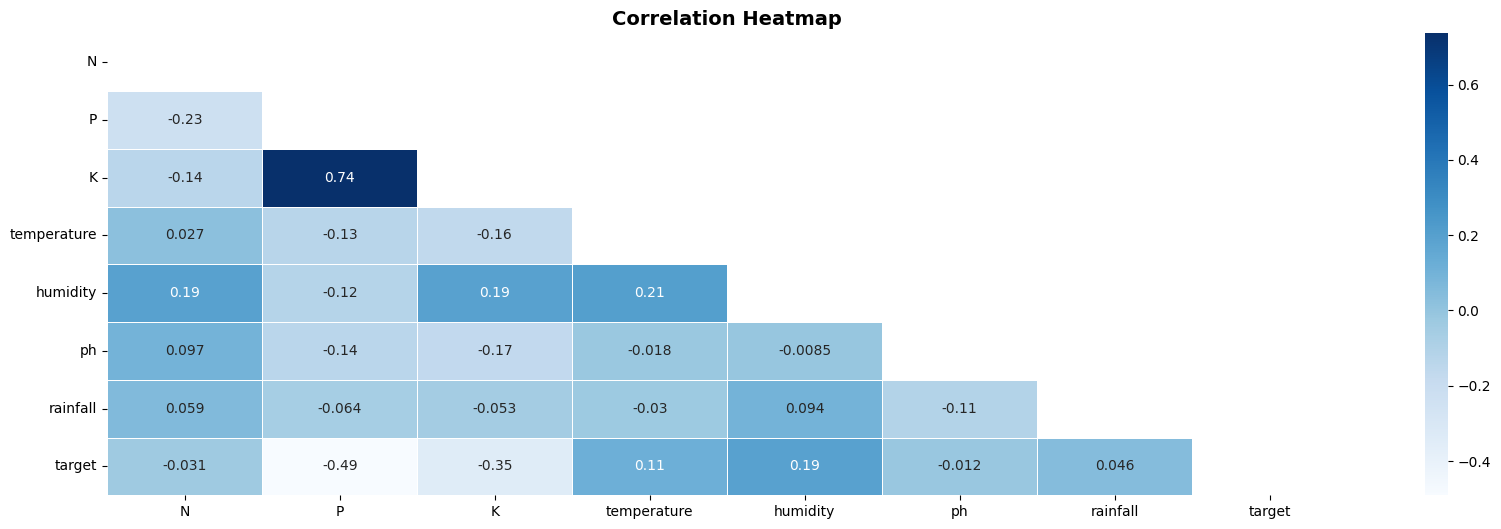

In [31]:
plt.figure(figsize=(20,6))

# using a mask to show only the lower half of the heatmap (Reduces Redundancy)
mask = np.triu(df.corr())

sns.heatmap(df.corr(),annot=True,mask=mask,cmap="Blues",linewidth=.5)
plt.title("Correlation Heatmap",fontweight='bold',fontsize=14)
plt.show()

#

### All the relationships at one place

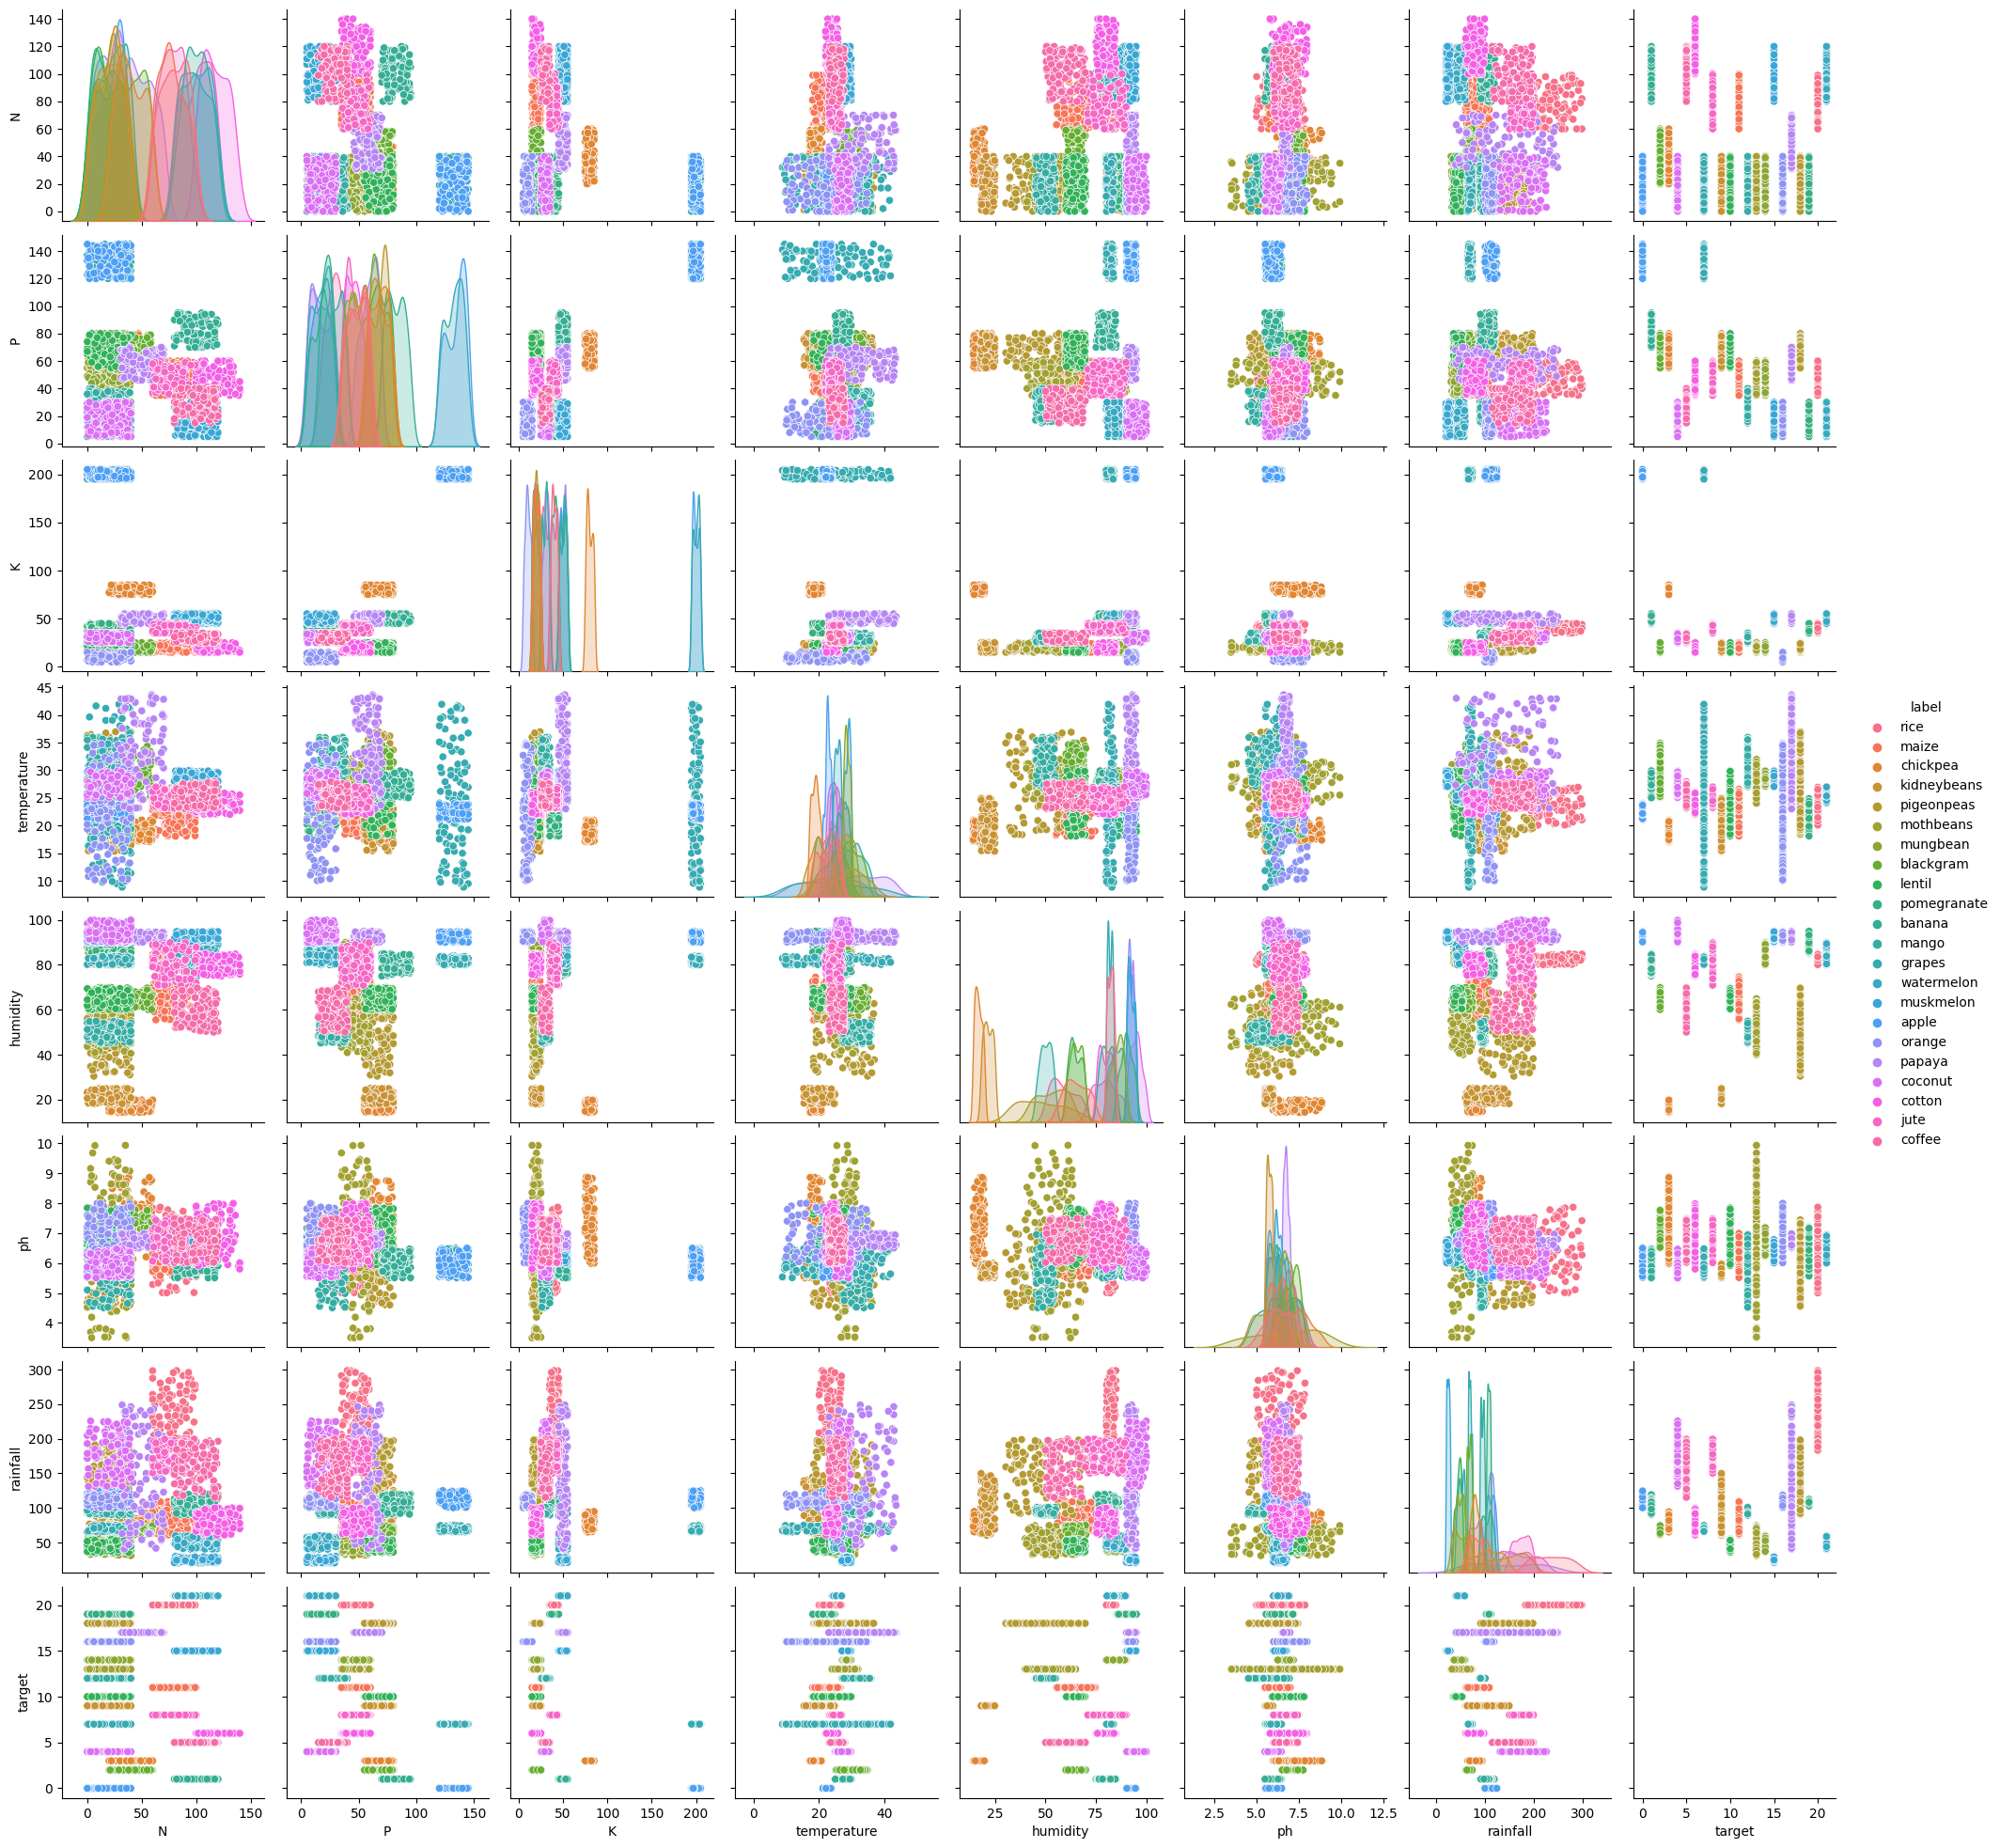

In [32]:
sns.pairplot(df2,hue="label")

#

- We can admit that is so difficult so lets take one of those relationships and plot them (just for explanation)
- We will take Temperature vs Humidity

<Figure size 1000x600 with 0 Axes>

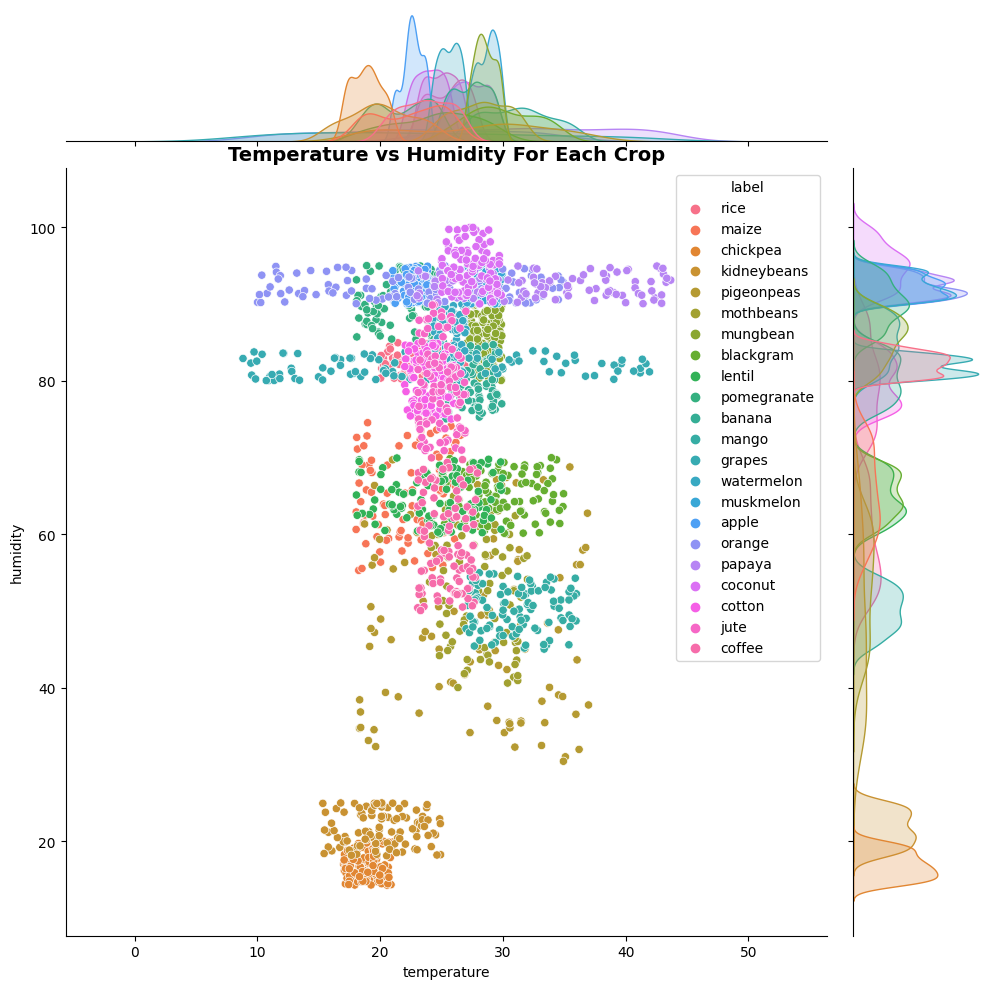

In [33]:
plt.figure(figsize=(10,6))
sns.jointplot(data=df2,x="temperature",y="humidity",hue="label",height=10)
plt.title("Temperature vs Humidity For Each Crop",fontweight="bold",fontsize=14)
plt.show()

<div class="alert alert-block alert-success">  
<h3>Conclusion From Multivariate Analysis:</h3>
</div>

- P and K show some correlation but since it is not very high we will not be dropping any of the columns.

- Both these columns show good coorelation with our dependent variable

<div class="alert alert-block alert-info">
<h2> End of EDA</h2>
</div>

- And with that we come to the end of Exploratory Data Analysis. Now enough of being Sherlocks lets be **"Iron Man"** and build something **AMAZING**

#

<h1 style="text-align:center;"> Feature Engineering : Part 2 </h1>


<div class="alert alert-block alert-info">
<h4>What Will We Be Doing ?</h4>
</div>

- We do not have any missing values and neither do we have any outliers
- We have already handled the categorical variable (**Label Encoding**)
- The data is also balanced

Now there is only one thing remaining that is Feature Scaling


<h2>3. Feature Scaling</h2>

 

<img src="images/scaling.png" width="420" align="center">

<div class="alert alert-block alert-info">
<h4>3.1 Splitting The Data Into X and Y</h4>
</div>

- Before we move onto scaling, we need to split the data into **x** and **y** 
- **x** being our independent variables
- **y** is our dependent variable i.e **"Target column"** for us

In [34]:
x = df.drop(["target"],axis=1)

y = df.target

#

<div class="alert alert-block alert-info">
<h4>3.2 Data Splitting</h4>
</div>

- Well that means splitting the data into **Train** and **Test**. But Why ?
> 1. The training data set is used to train and develop models
> 2. The testing data set is used to test how good or accurate the created model is

- For this we will use sklearn's **train_test_split** function 

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#

<div class="alert alert-block alert-info">
<h4>3.3 Scaling The Data</h4>
</div>

- For scaling we will use **Standard Scaler**

- Reasons to go with standard scaling include:
>1. We want each feature to have zero-mean and unit standard-deviation
>2. Standard Scaler is not affected by the presence of outliers (If any)

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled  = sc.fit_transform(X_train)
X_test_scaled  = sc.transform(X_test)

- Since we have scaled the data here we need to save this standard scaler object. so that it can be used when we take user input or make any prediction 

- To save the scaler object we will use **Pickle**
> Pickle Binarizes our object and makes it portable

In [37]:
import pickle

In [38]:
#pickle.dump(sc,open("scalerCR.pkl","wb"))

#

<div class="alert alert-block alert-info">
<h4>3.4 Model Building</h4>
</div>

- so here it gets interesting instead of going for traditional way of creating each model one by one and then comparing them, we will create a function that will output a dataframe
- Dataframe will contain:
> - Names of all the models 
> - Each Model Evaluation matrix as a column and their respective values

- And so it will be much easier to compare the models. I know its heavy but lets start!

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score

model1 = KNeighborsClassifier(n_neighbors=5)
model2 = RandomForestClassifier(n_estimators=20,random_state=42)
model3 = XGBClassifier(n_estimators=20,random_state=42)
model4 = LogisticRegressionCV(random_state=42)
model5 = GaussianNB()
model6 = DecisionTreeClassifier(criterion="entropy",max_depth=10,random_state=42)
model7 = SVC(random_state=42)
model8 = GradientBoostingClassifier(n_estimators=30,random_state=42)
model9 = AdaBoostClassifier(estimator=DecisionTreeClassifier(),n_estimators=35,random_state=42)




def compare_models(X_train,X_test,y_train,y_test,x,y):
    accuracy,precision,recall,f1,cv_score = [],[],[],[],[]
    
    classifiers = []
    classifiers.append(model1)
    classifiers.append(model2)
    classifiers.append(model3)
    classifiers.append(model4)    
    classifiers.append(model5)    
    classifiers.append(model6)    
    classifiers.append(model7)    
    classifiers.append(model8)    
    classifiers.append(model9)    
    
    
    
    for classifier in classifiers:
        
        classifier.fit(X_train,y_train)
        y_pred = classifier.predict(X_test)
        
        accuracy.append(accuracy_score(y_test,y_pred)*100)
        
        precision.append(precision_score(y_test,y_pred,average="micro")*100)
        
        recall.append(recall_score(y_test,y_pred,average="micro")*100)
        
        f1.append(f1_score(y_test,y_pred,average='micro'))
        
        score = cross_val_score(classifier,x,y,cv=5)
        cv_score.append(np.mean(score))
        
    df = pd.DataFrame({"Accuracy":accuracy,
                       "Precision":precision,
                      "Recall":recall,
                      "F1":f1,
                       "Cross val Score":cv_score,
                      "Model":["KNN","Random Forest","XGB","Logistic Regression","Gaussian NB","Decision Tree",
                              "SVC","Gradient Boost","Ada Boost"]})
    
    df = df.sort_values(by=["Cross val Score","Accuracy"],ascending=False)
    
    return classifiers,df
        

In [40]:
classifiers,df = compare_models(X_train_scaled,X_test_scaled,y_train, y_test,x,y)

#

<div class="alert alert-block alert-info">
<h4>3.5 Model Comparison</h4>
</div>

- Now that we have done the difficult stuff, we are ready to reap the rewards. Lets compare our models

In [41]:
df

Accuracy  Precision     Recall        F1  Cross val Score   
4  99.449036  99.449036  99.449036  0.994490         0.995000  \
1  98.898072  98.898072  98.898072  0.988981         0.994545   
2  97.933884  97.933884  97.933884  0.979339         0.990909   
7  97.933884  97.933884  97.933884  0.979339         0.988636   
8  97.382920  97.382920  97.382920  0.973829         0.988182   
5  98.071625  98.071625  98.071625  0.980716         0.981818   
0  95.730028  95.730028  95.730028  0.957300         0.979545   
6  97.382920  97.382920  97.382920  0.973829         0.978182   
3  97.382920  97.382920  97.382920  0.973829         0.969545   

                 Model  
4          Gaussian NB  
1        Random Forest  
2                  XGB  
7       Gradient Boost  
8            Ada Boost  
5        Decision Tree  
0                  KNN  
6                  SVC  
3  Logistic Regression

#

<div class="alert alert-block alert-success">  
<h3>Conclusion From Model Comparison:</h3>
</div>

- **Gaussian Naive Bayes** seems to be at the top of the table
- Closely followed by the usual guys from our **Ensemble Team**, **Random Forest** and **XGBoost**

#

## 4. Result Evaluation

<div class="alert alert-block alert-info">
<h4>Putting Our Top 2 Performers To The Test</h4>
</div>

- So here we are at the penultimate stage of this part of our project!
- We have a Heavy-weight Battle in front of us 
- **Gaussian NB** vs **Random Forest** is like our **Mumbai Indians** Vs **Chennai Super Kings** match-up! 
- Lets see how they perform 

### Random Forest First

In [42]:
modelRF = RandomForestClassifier(n_estimators=10)
modelRF.fit(X_train_scaled,y_train)
y_predRF  = model2.predict(X_test_scaled)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        28
           2       0.94      1.00      0.97        29
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        25
           8       0.88      1.00      0.93        35
           9       1.00      1.00      1.00        41
          10       1.00      0.96      0.98        28
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        34
          13       0.97      0.97      0.97        38
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00        27
          17       1.00    

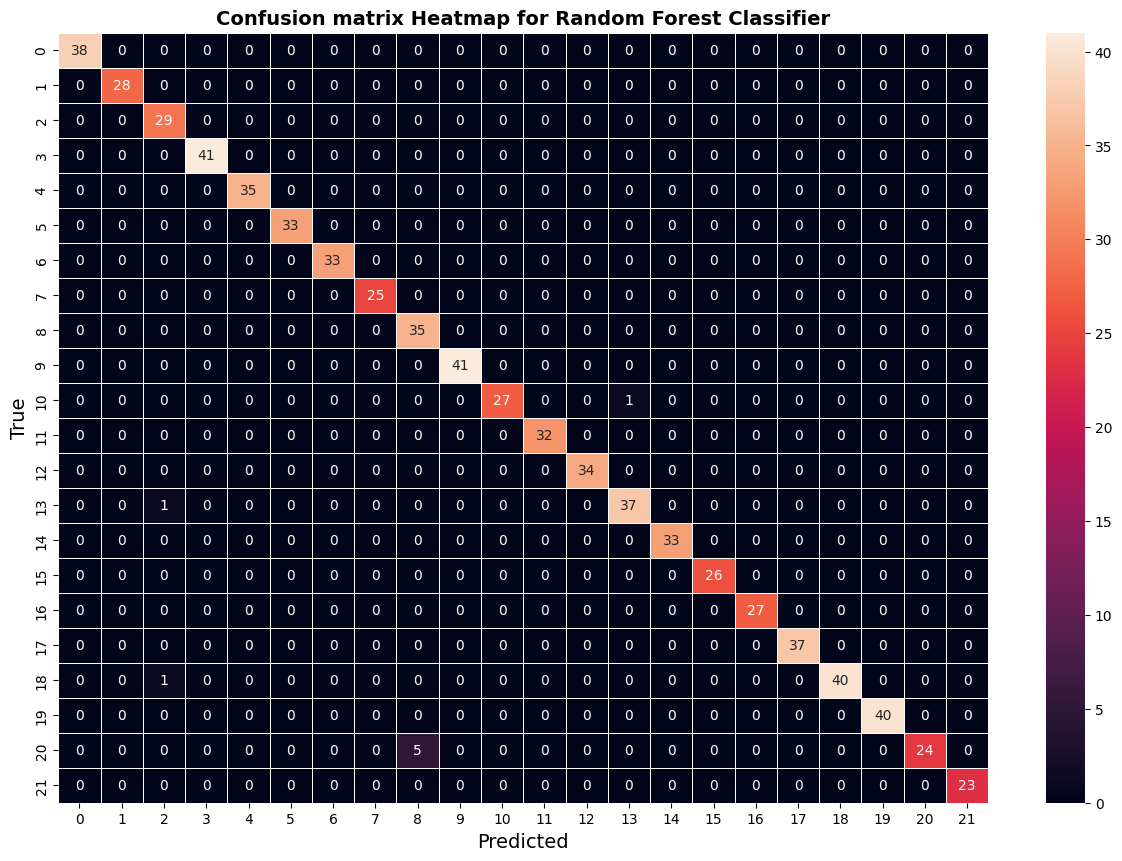

In [44]:
cm = confusion_matrix(y_test,y_predRF)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,linewidths=0.5)
plt.title("Confusion matrix Heatmap for Random Forest Classifier",fontweight="bold",fontsize=14)
plt.xlabel('Predicted',fontsize=14)
plt.ylabel('True',fontsize=14)
plt.show()


#

### Gaussian NB

In [45]:
modelNB = GaussianNB()
modelNB.fit(X_train_scaled,y_train)
y_predNB  = modelNB.predict(X_test_scaled)

In [46]:
print(classification_report(y_test,y_predNB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        25
           8       0.90      1.00      0.95        35
           9       1.00      1.00      1.00        41
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        34
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00        27
          17       1.00    

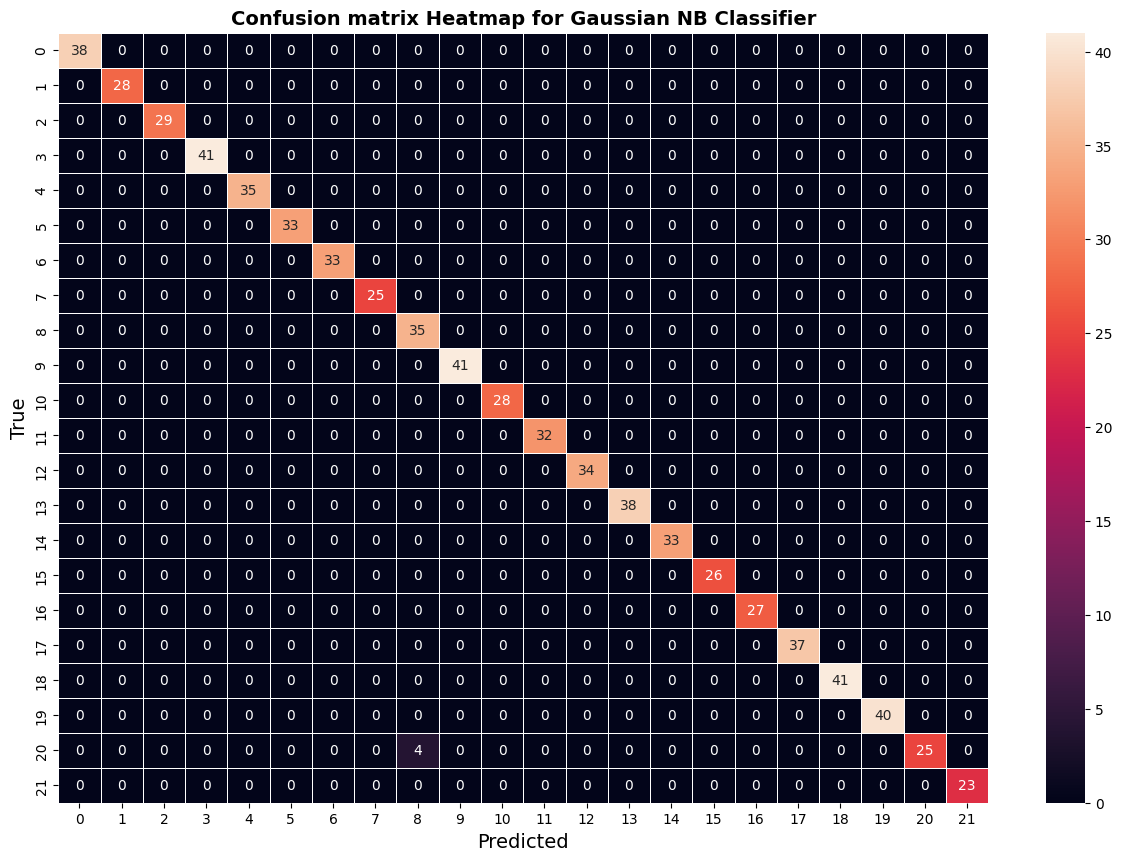

In [47]:
cm = confusion_matrix(y_test,y_predNB)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,linewidths=0.5)
plt.title("Confusion matrix Heatmap for Gaussian NB Classifier",fontweight="bold",fontsize=14)
plt.xlabel('Predicted',fontsize=14)
plt.ylabel('True',fontsize=14)
plt.show()


#

<div class="alert alert-block alert-info">
<h2>Finishing This In Style</h2>
</div>  

<img src="images/dhoni.gif" width="420" align="center">

<div class="alert alert-block alert-info">
<h4>Saving The Model</h4>
</div>

- Since Gaussian NB Classifier is giving the best result. We will use this model in our app

In [48]:
#pickle.dump(modelNB,open("CropRec_model.pkl","wb"))

#

<h1 style="text-align:center;"> The End </h1>